In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import seaborn as sns
import  matplotlib.pyplot as plt

In [89]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### IMPORTING THE TRAINING DATA

In [2]:
filenames_list = os.listdir('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TRAIN/Train/')

Data = pd.DataFrame({})
for file_names in tqdm(filenames_list):
    temp_df = pd.read_csv('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TRAIN/Train/' + file_names)
    Data = Data.append(temp_df)

100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [07:15<00:00,  1.76s/it]


### IMPORTING THE TEST DATA

In [3]:
filenames_list1 = os.listdir('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TEST/Test/')

Data1 = pd.DataFrame({})
for file_names1 in tqdm(filenames_list1):
    temp_df1 = pd.read_csv('C:/Users/Dell/Desktop/EEG_Alcoholics/SMNI_CMI_TEST/Test/' + file_names1)
    Data1 = Data1.append(temp_df1)

100%|████████████████████████████████████████████████████████████████████████████████| 480/480 [07:59<00:00,  1.80s/it]


In [4]:
Data2=Data
Data3=Data1

### EXPLORING AND CLEANING THE TRAINING DATA

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667712 entries, 0 to 16383
Data columns (total 10 columns):
Unnamed: 0            int64
trial number          int64
sensor position       object
sample num            int64
sensor value          float64
subject identifier    object
matching condition    object
channel               int64
name                  object
time                  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 643.5+ MB


In [20]:
Data2.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,34,0,-8.921,0,0,0,0,0.000000
1,6,0,34,1,-8.433,0,0,0,0,0.003906
2,7,0,34,2,-2.574,0,0,0,0,0.007812
3,8,0,34,3,5.239,0,0,0,0,0.011719
4,9,0,34,4,11.587,0,0,0,0,0.015625


In [6]:
Data['sensor position'].unique()

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6',
       'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6',
       'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2',
       'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4',
       'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4',
       'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2',
       'P1', 'CPZ', 'nd', 'Y'], dtype=object)

In [7]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


In [8]:
Data.dtypes

Unnamed: 0              int64
trial number            int64
sensor position        object
sample num              int64
sensor value          float64
subject identifier     object
matching condition     object
channel                 int64
name                   object
time                  float64
dtype: object

In [9]:
Data.describe(include=np.object)

,sensor position,subject identifier,matching condition,name
count,7667712,7667712,7667712,7667712
unique,64,2,3,16
top,OZ,a,S1 obj,co2c0000337
freq,119808,3850240,2621440,491520


#### Checking for null values

In [10]:
Data.isna().any().any()

False

In [11]:
Data.isnull().sum()

Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name                  0
time                  0
dtype: int64

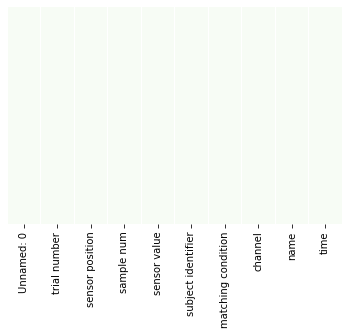

In [12]:
sns.heatmap(Data.isnull(), yticklabels = False, cbar = False, cmap='Greens')


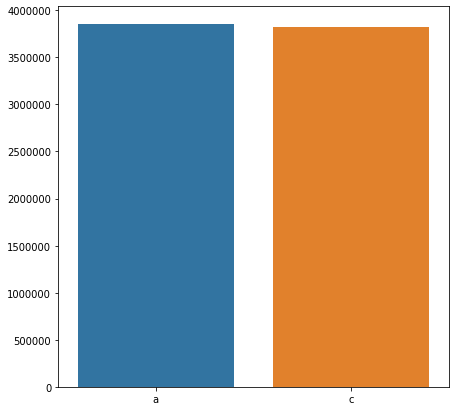

In [13]:
plt.figure(figsize=(7,7))
sns.barplot(x=Data['subject identifier'].value_counts().index,
              y=Data['subject identifier'].value_counts().values)

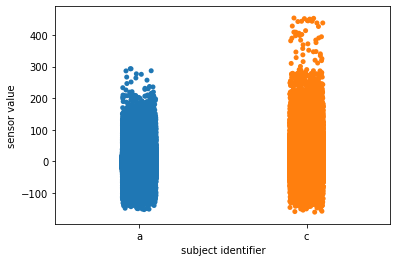

In [14]:
sns.stripplot(x="subject identifier",y="sensor value",data=Data)

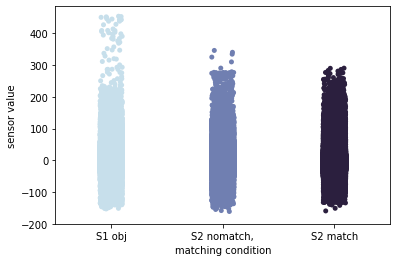

In [15]:
sns.stripplot(x="matching condition",y="sensor value",data=Data,palette="ch:s=.25,rot=-.25")

Text(0.5, 1.0, 'Alcoholic or Controlled')

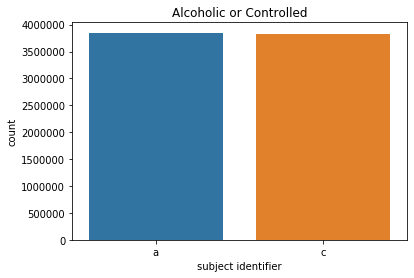

In [16]:
sns.countplot(x='subject identifier',data=Data)
plt.title('Alcoholic or Controlled')

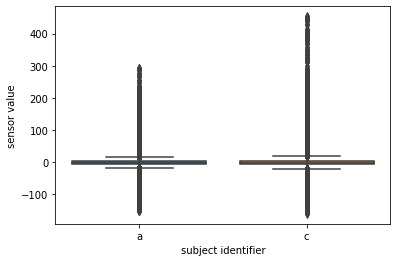

In [17]:
ax=sns.boxplot(x="subject identifier",y="sensor value",data=Data)
# plt.ylim(-50,50)

Text(0.5, 1.0, 'Name and subject identifier')

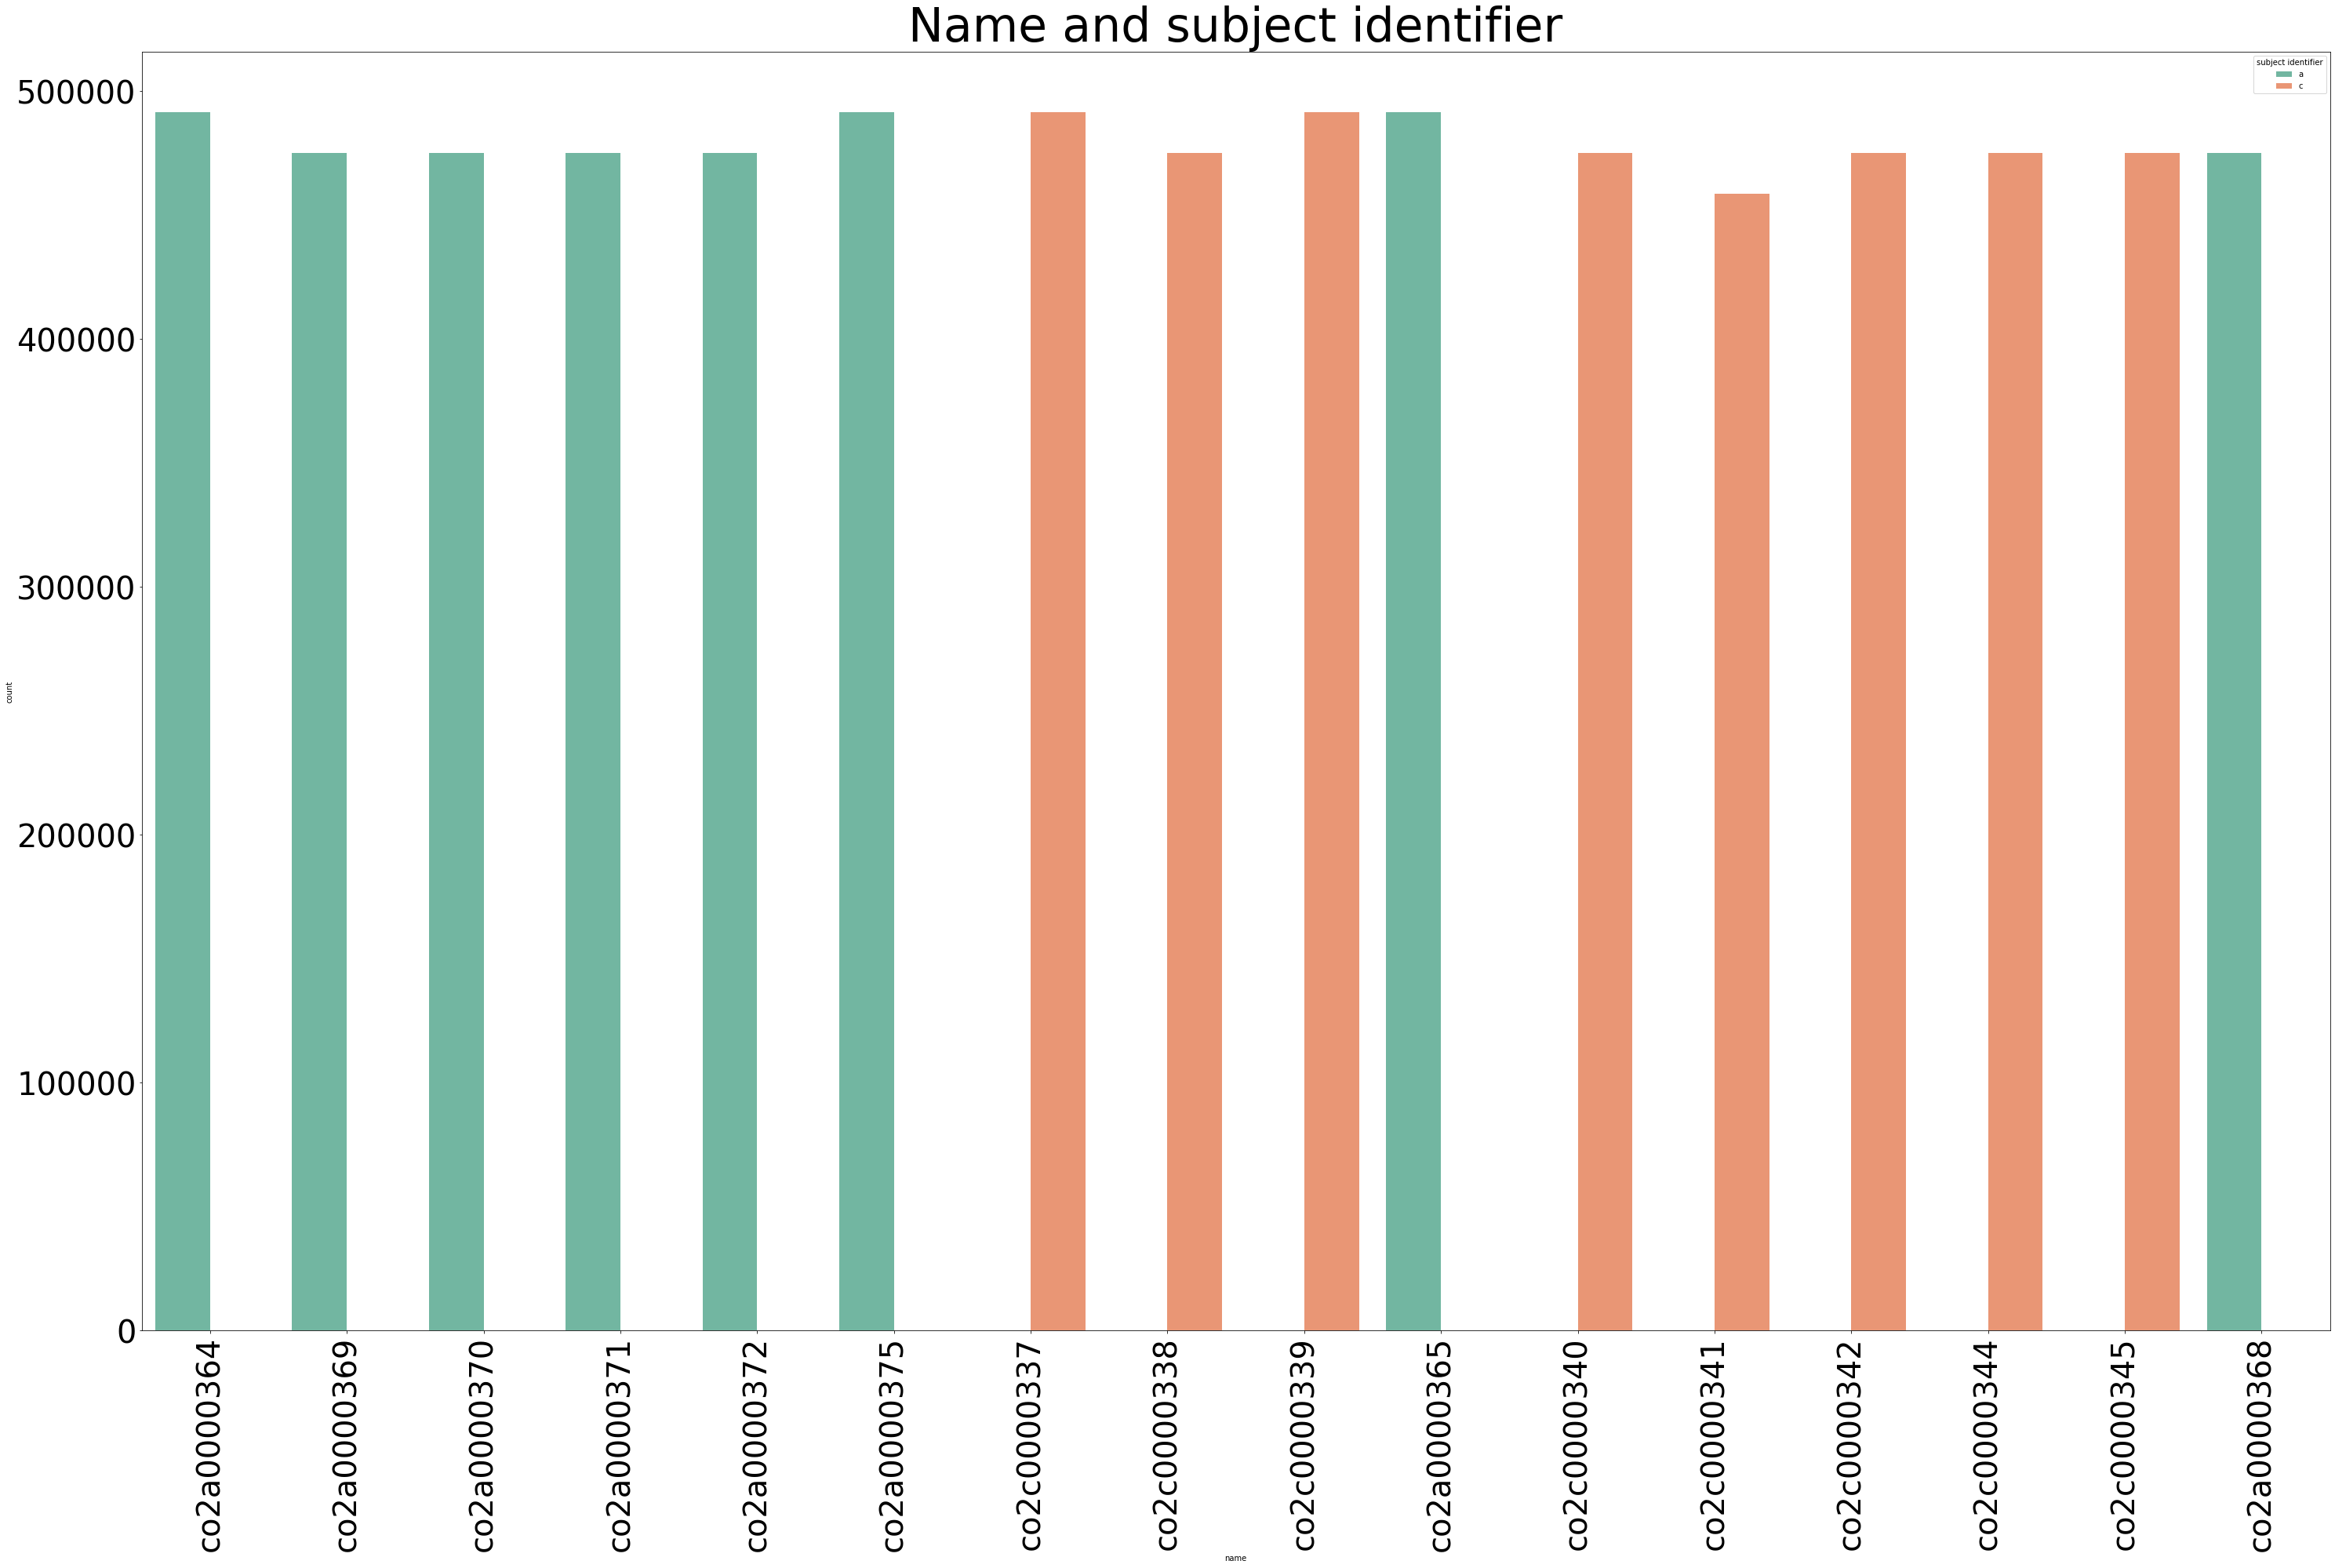

In [18]:
plt.figure(figsize=(50,30))
sns.countplot('name',data=Data,hue='subject identifier',palette="Set2",dodge=True)
plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Name and subject identifier',fontsize=60)

Text(0.5, 1.0, 'Name and matching condition')

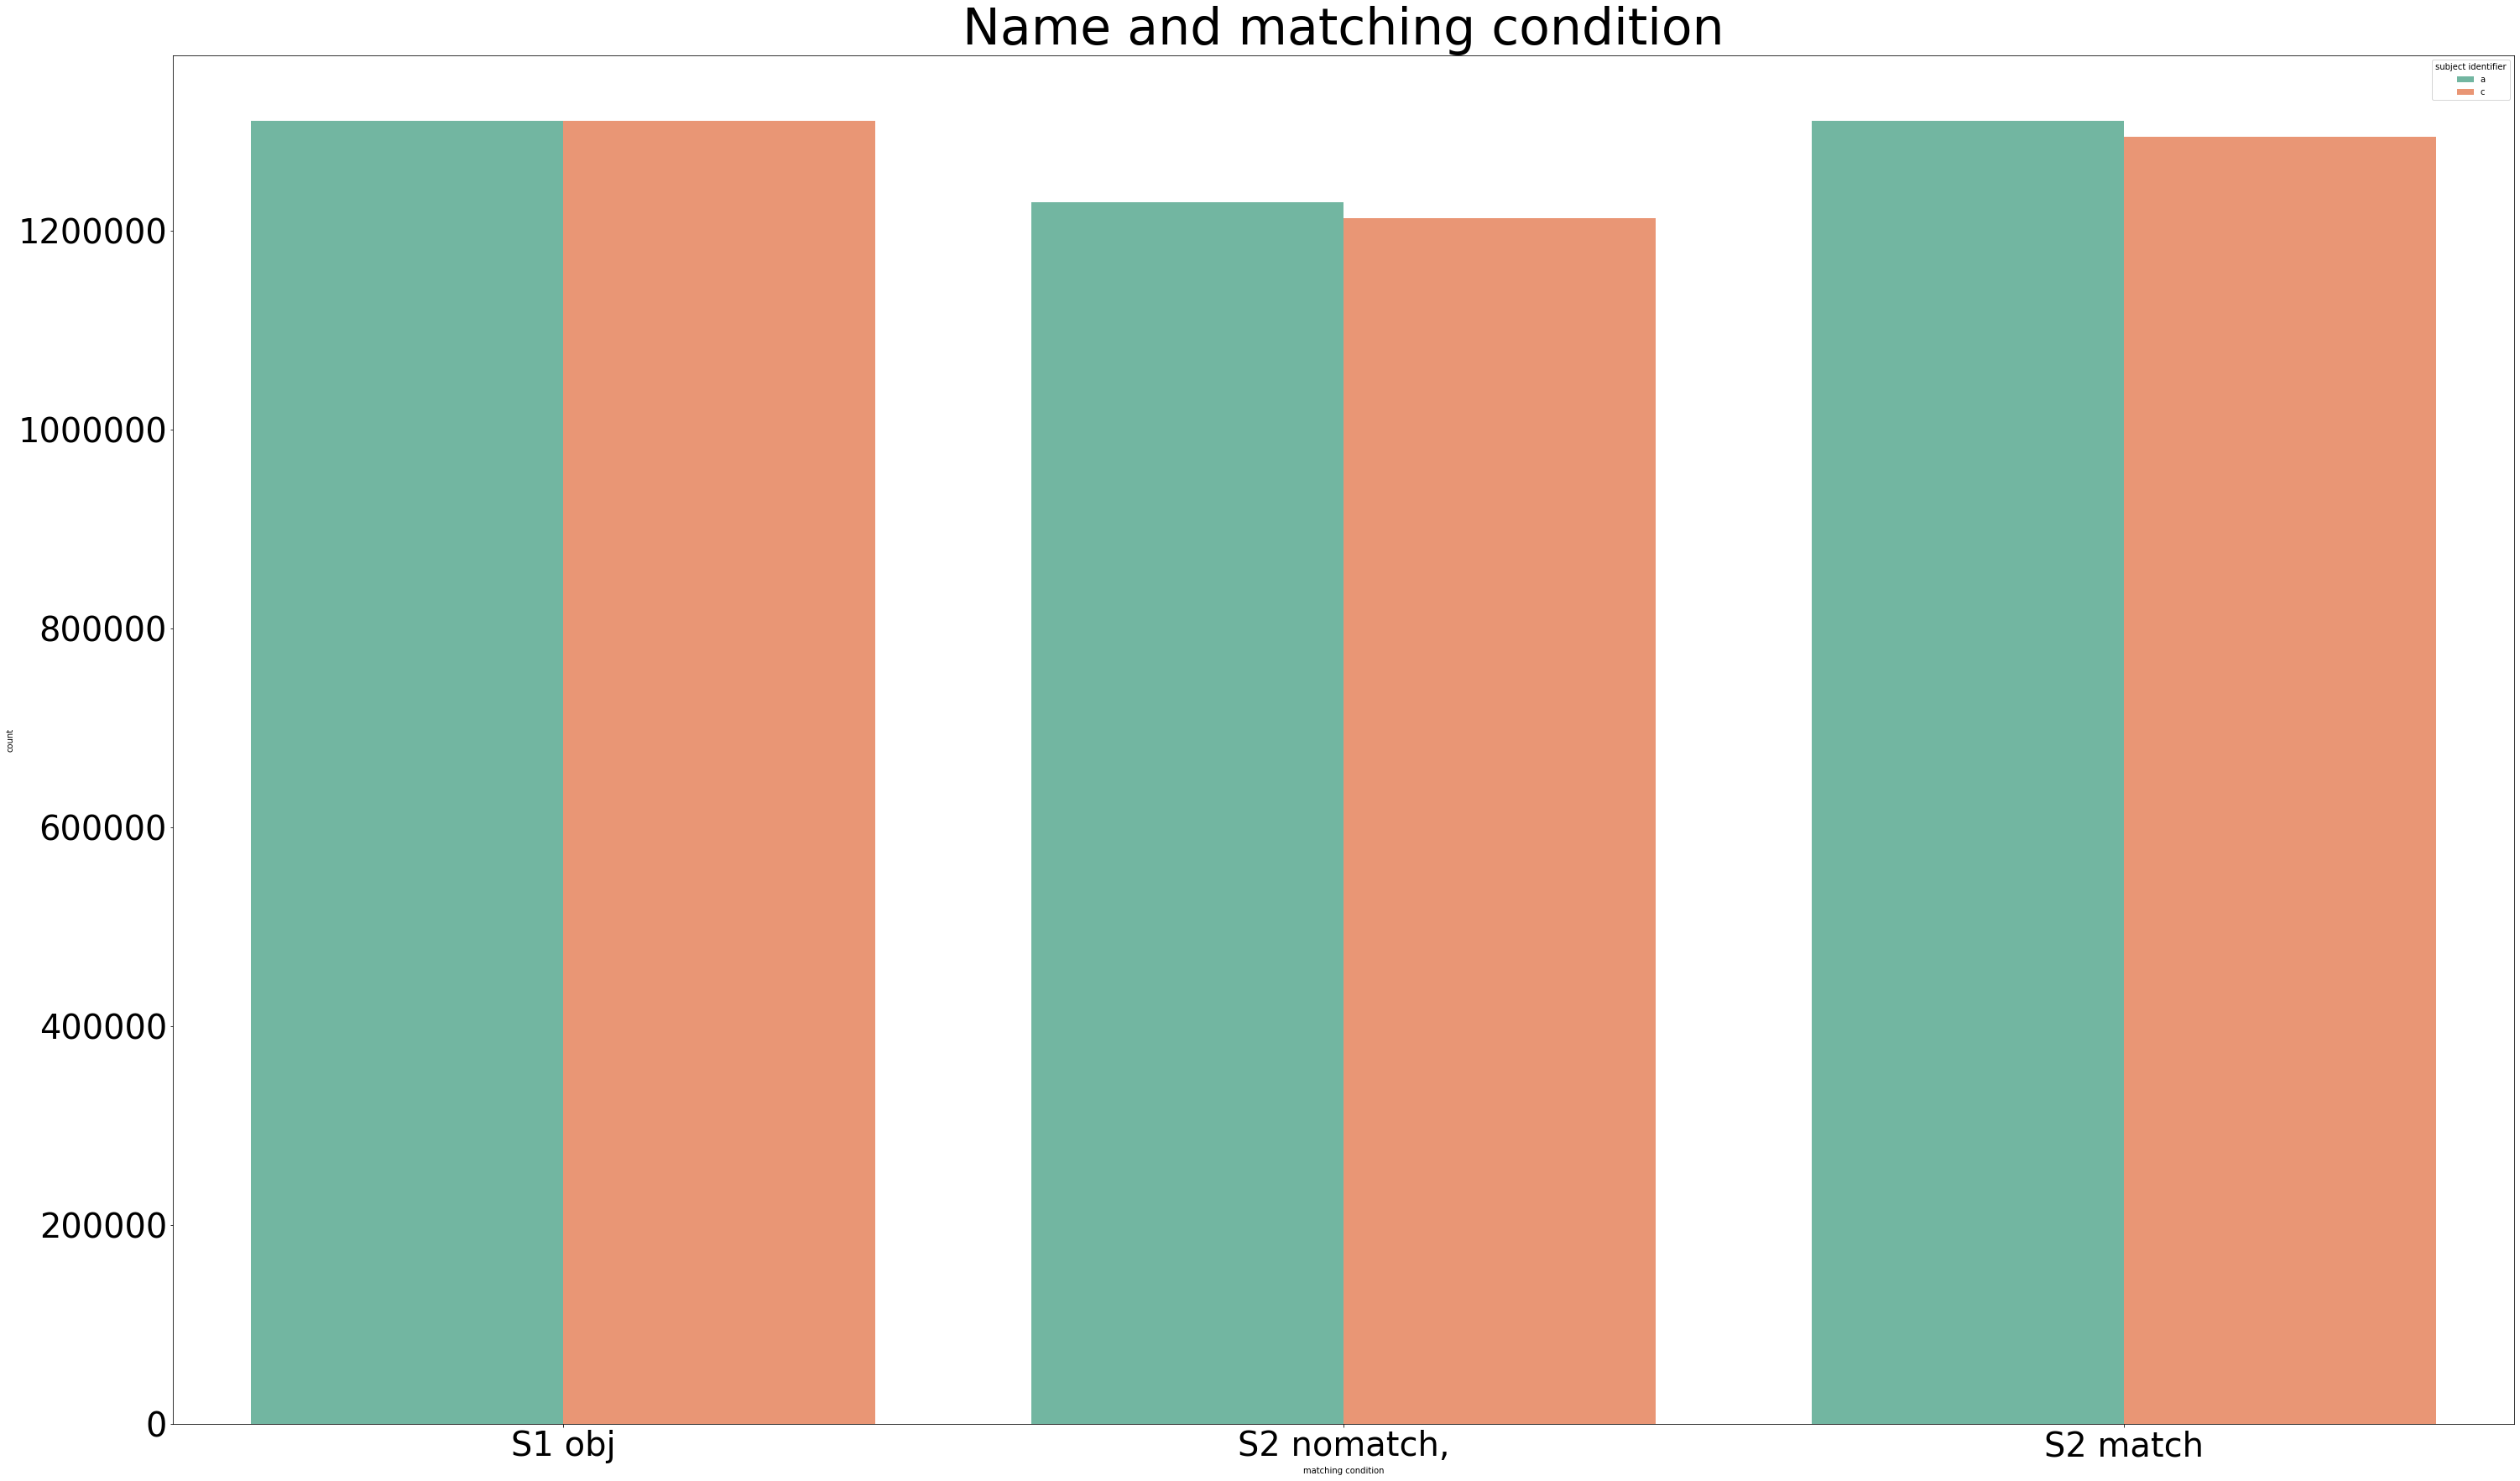

In [19]:
plt.figure(figsize=(50,30))
sns.countplot('matching condition',data=Data,hue='subject identifier',palette="Set2",dodge=True)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Name and matching condition',fontsize=60)

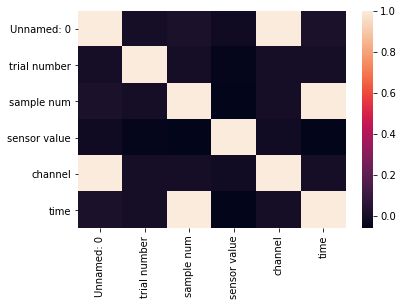

In [20]:
sns.heatmap(Data.corr())

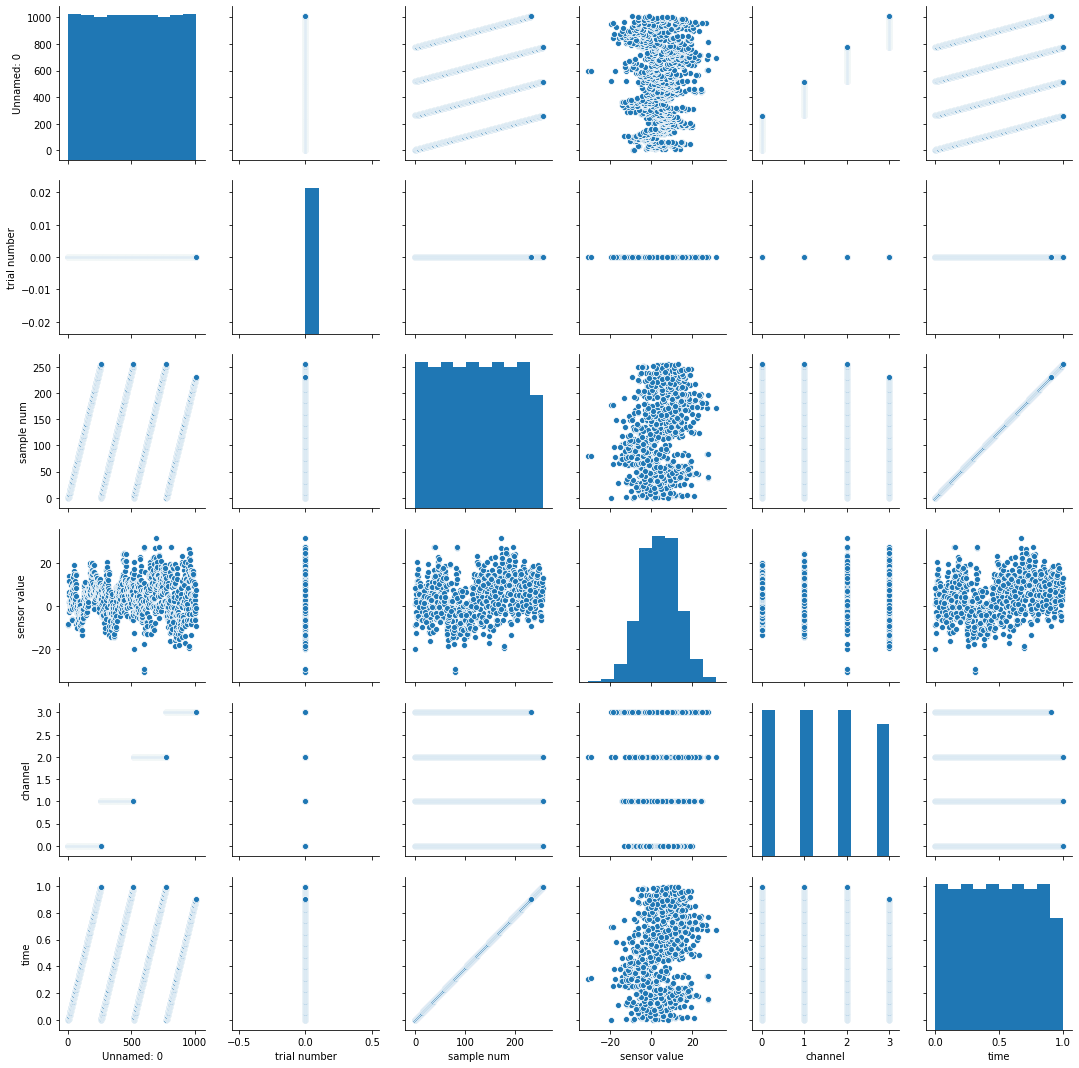

In [21]:
sns.pairplot(Data[:1000])

In [22]:
Data.shape

(7667712, 10)

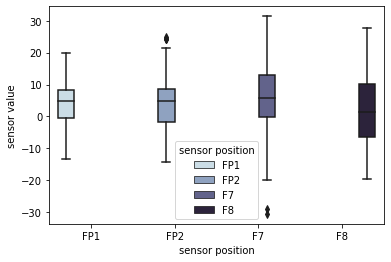

In [23]:
sns.boxplot(x="sensor position",y="sensor value", hue="sensor position", data=Data[:1000],palette='ch:s=.25,rot=-.25')

### PREPROCESSING OF DATA

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [6]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


In [7]:
Data['sensor position'] = le.fit_transform(Data['sensor position'])
Data['subject identifier'] = le.fit_transform(Data['subject identifier'])
Data['matching condition'] = le.fit_transform(Data['matching condition'])
Data['name'] = le.fit_transform(Data['name'])

In [21]:
Data=Data2

In [22]:
Data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,34,0,-8.921,0,0,0,0,0.000000
1,6,0,34,1,-8.433,0,0,0,0,0.003906
2,7,0,34,2,-2.574,0,0,0,0,0.007812
3,8,0,34,3,5.239,0,0,0,0,0.011719
4,9,0,34,4,11.587,0,0,0,0,0.015625


In [9]:
Data.dtypes

Unnamed: 0              int64
trial number            int64
sensor position         int32
sample num              int64
sensor value          float64
subject identifier      int32
matching condition      int32
channel                 int64
name                    int32
time                  float64
dtype: object

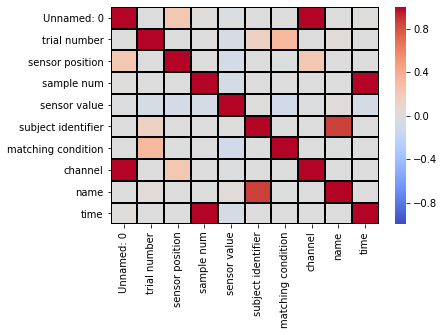

In [10]:
sns.heatmap(Data.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')


In [11]:
Data.corr()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
Unnamed: 0,1.000000e+00,-4.509105e-19,2.226379e-01,1.556410e-02,-0.015099,9.507910e-20,-1.547055e-20,9.998789e-01,3.144073e-18,1.556410e-02
trial number,-4.509105e-19,1.000000e+00,1.670184e-16,9.416923e-19,-0.048453,1.483321e-01,3.275459e-01,-1.381672e-18,2.435288e-02,9.416923e-19
sensor position,2.226379e-01,1.670184e-16,1.000000e+00,0.000000e+00,-0.065231,2.500356e-15,-6.181190e-15,2.226648e-01,1.394852e-15,0.000000e+00
sample num,1.556410e-02,9.416923e-19,0.000000e+00,1.000000e+00,-0.059864,1.178719e-21,-8.027997e-22,0.000000e+00,5.339332e-18,1.000000e+00
sensor value,-1.509891e-02,-4.845298e-02,-6.523135e-02,-5.986415e-02,1.000000,1.316460e-02,-9.009906e-02,-1.416890e-02,2.885555e-02,-5.986415e-02
subject identifier,9.507910e-20,1.483321e-01,2.500356e-15,1.178719e-21,0.013165,1.000000e+00,-2.754443e-03,1.325834e-19,8.663313e-01,1.178719e-21
matching condition,-1.547055e-20,3.275459e-01,-6.181190e-15,-8.027997e-22,-0.090099,-2.754443e-03,1.000000e+00,-1.917669e-17,-6.777738e-03,-8.027997e-22
channel,9.998789e-01,-1.381672e-18,2.226648e-01,0.000000e+00,-0.014169,1.325834e-19,-1.917669e-17,1.000000e+00,3.380477e-19,0.000000e+00
name,3.144073e-18,2.435288e-02,1.394852e-15,5.339332e-18,0.028856,8.663313e-01,-6.777738e-03,3.380477e-19,1.000000e+00,5.339332e-18
time,1.556410e-02,9.416923e-19,0.000000e+00,1.000000e+00,-0.059864,1.178719e-21,-8.027997e-22,0.000000e+00,5.339332e-18,1.000000e+00


In [12]:
Data1.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625


In [13]:
Data1['sensor position'] = le.fit_transform(Data1['sensor position'])
Data1['subject identifier'] = le.fit_transform(Data1['subject identifier'])
Data1['matching condition'] = le.fit_transform(Data1['matching condition'])
Data1['name'] = le.fit_transform(Data1['name'])

### GROUPING THE DATASETS WRT TO TRIAL NUMBER

In [23]:
Data_train=Data.groupby('trial number')

In [24]:
Data_train = Data_train.mean()

In [25]:
Data_train.head()

,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
trial number,,,,,,,,,
0,8228.0,31.5,127.5,-0.783420,0.500000,0.0,31.5,7.571429,0.498047
2,8228.0,31.5,127.5,-0.476310,0.454545,0.0,31.5,6.909091,0.498047
3,8228.0,31.5,127.5,-3.831912,0.545455,1.0,31.5,8.818182,0.498047
4,8228.0,31.5,127.5,-0.359001,0.454545,0.0,31.5,7.454545,0.498047
5,8228.0,31.5,127.5,-2.100669,0.538462,2.0,31.5,8.384615,0.498047


In [26]:
Data_train=Data_train.reset_index()

In [27]:
Data_train.head()

,trial number,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,0,8228.0,31.5,127.5,-0.783420,0.500000,0.0,31.5,7.571429,0.498047
1,2,8228.0,31.5,127.5,-0.476310,0.454545,0.0,31.5,6.909091,0.498047
2,3,8228.0,31.5,127.5,-3.831912,0.545455,1.0,31.5,8.818182,0.498047
3,4,8228.0,31.5,127.5,-0.359001,0.454545,0.0,31.5,7.454545,0.498047
4,5,8228.0,31.5,127.5,-2.100669,0.538462,2.0,31.5,8.384615,0.498047


In [28]:
Data_train.loc[Data_train['subject identifier'] < 0.5,'subject identifier'] = 0
Data_train.loc[Data_train['subject identifier'] >= 0.5,'subject identifier'] = 1

In [29]:
Data_train.head()

,trial number,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,0,8228.0,31.5,127.5,-0.783420,1.0,0.0,31.5,7.571429,0.498047
1,2,8228.0,31.5,127.5,-0.476310,0.0,0.0,31.5,6.909091,0.498047
2,3,8228.0,31.5,127.5,-3.831912,1.0,1.0,31.5,8.818182,0.498047
3,4,8228.0,31.5,127.5,-0.359001,0.0,0.0,31.5,7.454545,0.498047
4,5,8228.0,31.5,127.5,-2.100669,1.0,2.0,31.5,8.384615,0.498047


In [31]:
Data_test=Data1.groupby('trial number').mean()

In [32]:
Data_test.head()

,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
trial number,,,,,,,,,
20,8228.0,31.5,127.5,-0.196247,0.333333,0.0,31.5,6.666667,0.498047
22,8228.0,31.5,127.5,0.470601,0.375000,0.0,31.5,7.125000,0.498047
24,8228.0,31.5,127.5,0.225668,0.500000,0.0,31.5,8.625000,0.498047
26,8228.0,31.5,127.5,-0.559732,0.500000,0.0,31.5,8.500000,0.498047
28,8228.0,31.5,127.5,0.546841,0.444444,0.0,31.5,7.777778,0.498047


In [33]:
Data_test=Data_test.reset_index()

In [34]:
Data_test.head()

,trial number,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,20,8228.0,31.5,127.5,-0.196247,0.333333,0.0,31.5,6.666667,0.498047
1,22,8228.0,31.5,127.5,0.470601,0.375000,0.0,31.5,7.125000,0.498047
2,24,8228.0,31.5,127.5,0.225668,0.500000,0.0,31.5,8.625000,0.498047
3,26,8228.0,31.5,127.5,-0.559732,0.500000,0.0,31.5,8.500000,0.498047
4,28,8228.0,31.5,127.5,0.546841,0.444444,0.0,31.5,7.777778,0.498047


In [37]:
Data_test.loc[Data_test['subject identifier'] < 0.5,'subject identifier'] = 0
Data_test.loc[Data_test['subject identifier'] >= 0.5,'subject identifier'] = 1

In [38]:
Data_test.head()

,trial number,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,20,8228.0,31.5,127.5,-0.196247,0.0,0.0,31.5,6.666667,0.498047
1,22,8228.0,31.5,127.5,0.470601,0.0,0.0,31.5,7.125000,0.498047
2,24,8228.0,31.5,127.5,0.225668,1.0,0.0,31.5,8.625000,0.498047
3,26,8228.0,31.5,127.5,-0.559732,1.0,0.0,31.5,8.500000,0.498047
4,28,8228.0,31.5,127.5,0.546841,0.0,0.0,31.5,7.777778,0.498047


In [35]:
Data_train.describe()

,trial number,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
count,62.000000,62.0,62.0,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000
mean,37.661290,8228.0,31.5,127.5,-2.231192,0.564516,1.064516,31.5,7.740380,0.498047
std,26.946178,0.0,0.0,0.0,1.828379,0.499868,0.827221,0.0,1.842971,0.000000
min,0.000000,8228.0,31.5,127.5,-6.434309,0.000000,0.000000,31.5,0.000000,0.498047
25%,16.250000,8228.0,31.5,127.5,-3.503602,0.000000,0.000000,31.5,6.937500,0.498047
50%,31.500000,8228.0,31.5,127.5,-2.366529,1.000000,1.000000,31.5,7.464103,0.498047
75%,56.500000,8228.0,31.5,127.5,-0.974976,1.000000,2.000000,31.5,8.338462,0.498047
max,107.000000,8228.0,31.5,127.5,3.012096,1.000000,2.000000,31.5,11.666667,0.498047


In [39]:
Data_test.describe()

,trial number,Unnamed: 0,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
count,66.000000,66.0,66.0,66.0,66.000000,66.000000,66.000000,66.0,66.000000,66.000000
mean,64.924242,8228.0,31.5,127.5,-1.901778,0.636364,0.954545,31.5,7.630119,0.498047
std,27.426719,0.0,0.0,0.0,1.837076,0.484732,0.812059,0.0,1.459455,0.000000
min,20.000000,8228.0,31.5,127.5,-7.035621,0.000000,0.000000,31.5,2.000000,0.498047
25%,43.250000,8228.0,31.5,127.5,-3.072032,0.000000,0.000000,31.5,6.800000,0.498047
50%,59.500000,8228.0,31.5,127.5,-1.814557,1.000000,1.000000,31.5,7.519231,0.498047
75%,86.500000,8228.0,31.5,127.5,-0.507072,1.000000,2.000000,31.5,8.222222,0.498047
max,119.000000,8228.0,31.5,127.5,2.634119,1.000000,2.000000,31.5,12.000000,0.498047


In [40]:
test_data=Data_test.drop(['Unnamed: 0','subject identifier','name','channel','time'],axis=1)
test_target=Data_test['subject identifier']

In [41]:
test_data.shape

(66, 5)

In [42]:
test_target.shape

(66,)

### SPLITTING THE TRAINING DATASET INTO K FOLDS(K=10)

In [60]:
x,y = Data_train.drop(['Unnamed: 0','subject identifier','name','channel','time'],axis=1), Data_train['subject identifier']


In [61]:
x.head()

,trial number,sensor position,sample num,sensor value,matching condition
0,0,31.5,127.5,-0.783420,0.0
1,2,31.5,127.5,-0.476310,0.0
2,3,31.5,127.5,-3.831912,1.0
3,4,31.5,127.5,-0.359001,0.0
4,5,31.5,127.5,-2.100669,2.0


In [62]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: subject identifier, dtype: float64

In [63]:
x.describe()

,trial number,sensor position,sample num,sensor value,matching condition
count,62.000000,62.0,62.0,62.000000,62.000000
mean,37.661290,31.5,127.5,-2.231192,1.064516
std,26.946178,0.0,0.0,1.828379,0.827221
min,0.000000,31.5,127.5,-6.434309,0.000000
25%,16.250000,31.5,127.5,-3.503602,0.000000
50%,31.500000,31.5,127.5,-2.366529,1.000000
75%,56.500000,31.5,127.5,-0.974976,2.000000
max,107.000000,31.5,127.5,3.012096,2.000000


In [64]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.model_selection import KFold
from sklearn import model_selection

### LOGISTIC REGRESSION
#### Logistic Regression is used when the dependent variable(target) is categorical.

In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [91]:
# on training data
lr_score=cross_val_score(lr, x, y, cv=5)
lr_score.mean()


0.6474358974358975

In [92]:
# on testing data
lr_score1=cross_val_score(lr,test_data,test_target,cv=5)
lr_score1.mean()


0.7234432234432233

### NAIVE BAYES CLASSIFIER MODEL
#### Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering

In [93]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
# on training data
nb_score=cross_val_score(nb, x, y, cv=5)
nb_score.mean()

0.7012820512820513

In [94]:
# on testing data
nb_score1=cross_val_score(nb, test_data,test_target, cv=5)
nb_score1.mean()

0.7157509157509157

### RANDOM FOREST CLASSIFIER
#### Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# on training data
rf_score=cross_val_score(rf, x, y, cv=5)
rf_score.mean()

0.5987179487179487

In [96]:
# on testing data
rf_score1=cross_val_score(rf, test_data,test_target, cv=5)
rf_score1.mean()

0.563003663003663

### SUPPORT VECTOR MACHINE
#### The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [97]:
from sklearn.svm import SVC
svc=SVC()
# on training data
svc_score=cross_val_score(svc, x, y, cv=5)
svc_score.mean()

0.5038461538461538

In [98]:
# on testing data
svc_score1=cross_val_score(svc, test_data,test_target, cv=5)
svc_score1.mean()

0.6366300366300366

### K NEIGHBORS CLASSIFIER MODEL
#### Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point

In [99]:
from sklearn.neighbors import KNeighborsClassifier
KN_classifier = KNeighborsClassifier()
# on training data
kn_score=cross_val_score(KN_classifier, x, y, cv=5)
kn_score.mean()

0.46794871794871795

In [100]:
# on testing data
kn_score1=cross_val_score(KN_classifier, test_data,test_target, cv=5)
kn_score1.mean()

0.6663003663003663

#### PREDICTING VALUES FOR TRAINING AND TEST DATASET

In [101]:
from sklearn.model_selection import cross_val_predict

In [102]:
y_pred_lr = cross_val_predict(lr, x, y, cv=5)
y_pred_nb = cross_val_predict(nb, x, y, cv=5)
y_pred_rf = cross_val_predict(rf, x, y, cv=5)
y_pred_svc = cross_val_predict(svc, x, y, cv=5)
y_pred_kn = cross_val_predict(KN_classifier, x, y, cv=5)

In [103]:
y_pred_test_lr = cross_val_predict(lr, test_data,test_target, cv=5)
y_pred_test_nb = cross_val_predict(nb,test_data,test_target, cv=5)
y_pred_test_rf = cross_val_predict(rf,test_data, test_target, cv=5)
y_pred_test_svc = cross_val_predict(svc,test_data,test_target, cv=5)
y_pred_test_kn = cross_val_predict(KN_classifier,test_data,test_target, cv=5)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

[[21  6]
 [13 22]]


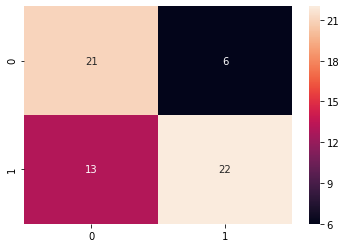

In [106]:
cm_nb = confusion_matrix(y, y_pred_nb)
print(cm_nb)
sns.heatmap(cm_nb, annot=True)

In [107]:
print(classification_report(y, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69        27
         1.0       0.79      0.63      0.70        35

    accuracy                           0.69        62
   macro avg       0.70      0.70      0.69        62
weighted avg       0.71      0.69      0.69        62



[[16  8]
 [11 31]]


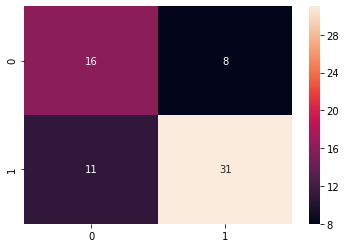

In [110]:
cm_nb_test = confusion_matrix(test_target, y_pred_test_nb)
print(cm_nb_test)
sns.heatmap(cm_nb_test, annot=True)

In [111]:
print(classification_report(test_target, y_pred_test_nb))

              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63        24
         1.0       0.79      0.74      0.77        42

    accuracy                           0.71        66
   macro avg       0.69      0.70      0.70        66
weighted avg       0.72      0.71      0.72        66



[[14 13]
 [18 17]]


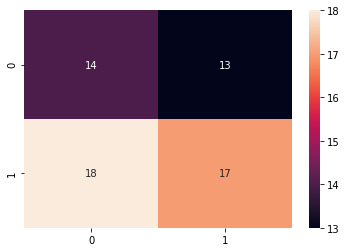

In [112]:
cm_rf = confusion_matrix(y, y_pred_rf)
print(cm_rf)
sns.heatmap(cm_rf, annot=True)

In [113]:
print(classification_report(y, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.44      0.52      0.47        27
         1.0       0.57      0.49      0.52        35

    accuracy                           0.50        62
   macro avg       0.50      0.50      0.50        62
weighted avg       0.51      0.50      0.50        62



[[11 13]
 [20 22]]


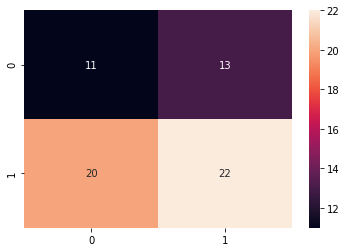

In [114]:
cm_rf_test = confusion_matrix(test_target, y_pred_test_rf)
print(cm_rf_test)
sns.heatmap(cm_rf_test, annot=True)

In [115]:
print(classification_report(test_target, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.35      0.46      0.40        24
         1.0       0.63      0.52      0.57        42

    accuracy                           0.50        66
   macro avg       0.49      0.49      0.49        66
weighted avg       0.53      0.50      0.51        66



[[16 11]
 [11 24]]


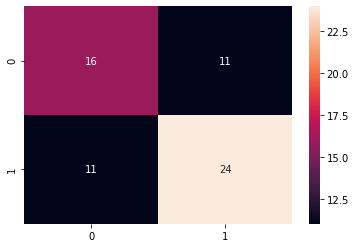

In [116]:
cm_lr = confusion_matrix(y, y_pred_lr)
print(cm_lr)
sns.heatmap(cm_lr, annot=True)

In [117]:
print(classification_report(y, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59        27
         1.0       0.69      0.69      0.69        35

    accuracy                           0.65        62
   macro avg       0.64      0.64      0.64        62
weighted avg       0.65      0.65      0.65        62



[[ 9 15]
 [ 3 39]]


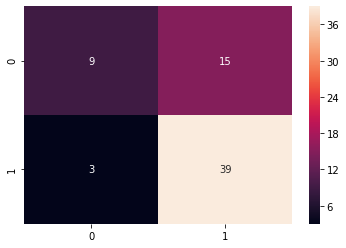

In [118]:
cm_lr_test = confusion_matrix(test_target, y_pred_test_lr)
print(cm_lr_test)
sns.heatmap(cm_lr_test, annot=True)

In [119]:
print(classification_report(test_target, y_pred_test_lr))

              precision    recall  f1-score   support

         0.0       0.75      0.38      0.50        24
         1.0       0.72      0.93      0.81        42

    accuracy                           0.73        66
   macro avg       0.74      0.65      0.66        66
weighted avg       0.73      0.73      0.70        66



[[ 5 22]
 [ 9 26]]


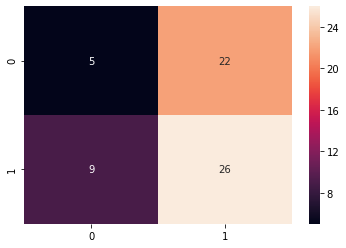

In [120]:
cm_svc = confusion_matrix(y, y_pred_svc)
print(cm_svc)
sns.heatmap(cm_svc, annot=True)

In [121]:
print(classification_report(y, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.36      0.19      0.24        27
         1.0       0.54      0.74      0.63        35

    accuracy                           0.50        62
   macro avg       0.45      0.46      0.44        62
weighted avg       0.46      0.50      0.46        62



[[ 0 24]
 [ 0 42]]


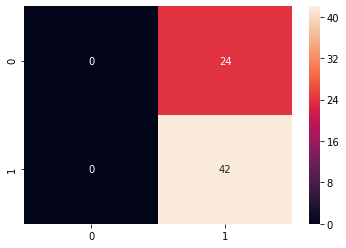

In [122]:
cm_svc_test = confusion_matrix(test_target, y_pred_test_svc)
print(cm_svc_test)
sns.heatmap(cm_svc_test, annot=True)

In [123]:
print(classification_report(test_target, y_pred_test_svc))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.64      1.00      0.78        42

    accuracy                           0.64        66
   macro avg       0.32      0.50      0.39        66
weighted avg       0.40      0.64      0.49        66



[[14 13]
 [20 15]]


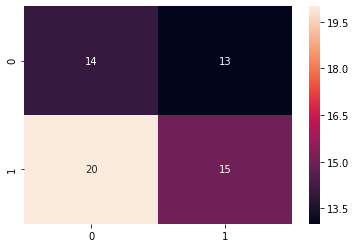

In [124]:
cm_kn = confusion_matrix(y, y_pred_kn)
print(cm_kn)
sns.heatmap(cm_kn, annot=True)

In [125]:
print(classification_report(y, y_pred_kn))

              precision    recall  f1-score   support

         0.0       0.41      0.52      0.46        27
         1.0       0.54      0.43      0.48        35

    accuracy                           0.47        62
   macro avg       0.47      0.47      0.47        62
weighted avg       0.48      0.47      0.47        62



[[17  7]
 [15 27]]


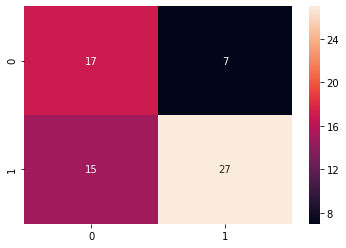

In [126]:
cm_kn_test = confusion_matrix(test_target, y_pred_test_kn)
print(cm_kn_test)
sns.heatmap(cm_kn_test, annot=True)

In [146]:
print(classification_report(test_target, y_pred_test_kn))

              precision    recall  f1-score   support

         0.0       0.53      0.71      0.61        24
         1.0       0.79      0.64      0.71        42

    accuracy                           0.67        66
   macro avg       0.66      0.68      0.66        66
weighted avg       0.70      0.67      0.67        66



### COMPARING ACCURACIES FROM BOTH THE DATASETS

In [157]:
Score = [[0,1,2,3,4],[0,1,2,3,4]]

In [159]:
Score[0][0]=kn_score.mean() #training accuracy
Score[1][0]=kn_score1.mean() 

Score[0][1]=lr_score.mean() #training accuracy
Score[1][1]=lr_score1.mean() 

Score[0][2]=nb_score.mean() #training accuracy
Score[1][2]=nb_score1.mean()

Score[0][3]=svc_score.mean() #training accuracy
Score[1][3]=svc_score1.mean()

Score[0][4]=rf_score.mean() #training accuracy
Score[1][4]=rf_score1.mean()

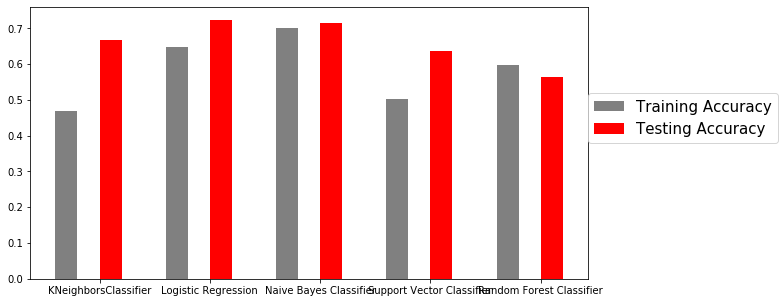

In [160]:
x=np.arange(5)
plt.figure(figsize=(10,5))
plt.bar(x+0.00,Score[0],width=0.20,color='gray',label='Training Accuracy')
plt.bar(x+0.40,Score[1],width=0.20,color='r',label='Testing Accuracy')
plt.xticks([0.30,1.3,2.3,3.3,4.3],['KNeighborsClassifier','Logistic Regression','Naive Bayes Classifier','Support Vector Classifier','Random Forest Classifier','SGD Classifier'])
plt.legend(fontsize=15,loc=(1.0,0.5))
plt.show()